<a href="https://colab.research.google.com/github/Dulavinya/EN3160-ImageProcessing/blob/main/A01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
uploaded = files.upload()


Saving a1images.zip to a1images.zip


In [5]:
import zipfile
import os

# Replace 'images.zip' with your actual zip file name
zip_file = "a1images.zip"

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall("images")  # Extract to folder named "images"

# Optional: list files extracted
print("Files extracted to 'images/':", os.listdir("images"))


Files extracted to 'images/': ['a1images']


In [6]:
import os

# List the files to confirm
print(os.listdir("images/a1images"))



['emma.jpg', 'einstein.png', 'daisy.jpg', 'spider.png', 'jeniffer.jpg', 'highlights_and_shadows.jpg', 'shells.tif', 'brain_proton_density_slice.png', 'a1q5images']


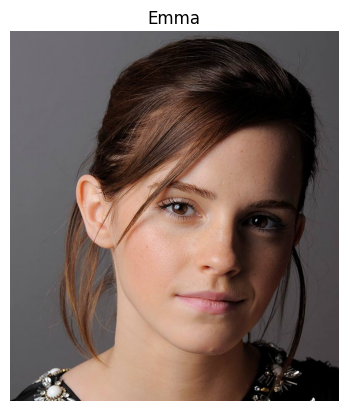

In [13]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Now load the image from the extracted folder
img = cv.imread("images/a1images/emma.jpg", cv.IMREAD_UNCHANGED)


if img is None:
    raise FileNotFoundError("Image not found. Check path and filename.")

# Display the image
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Emma")
plt.show()


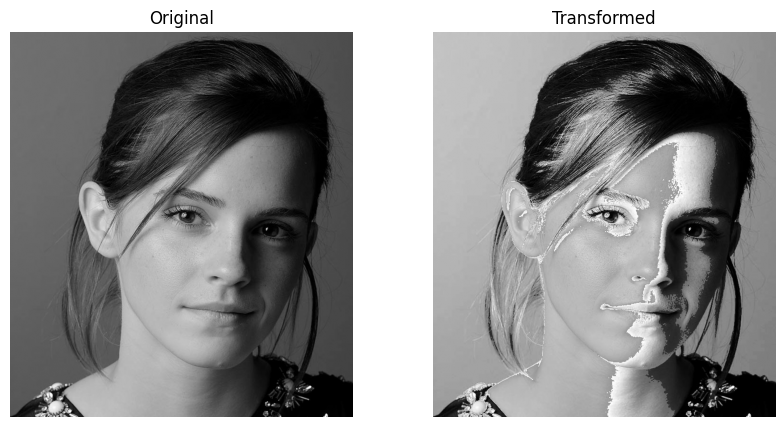

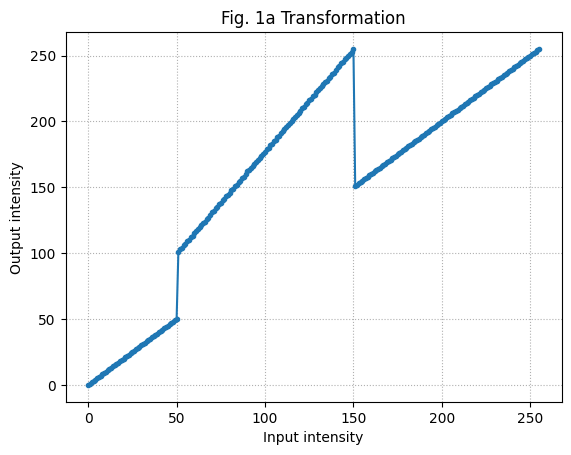

In [25]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read grayscale image
f = cv.imread('images/a1images/emma.jpg', cv.IMREAD_GRAYSCALE)

t1 = np.arange(0, 51)
t2 = np.linspace(100, 255, 101)
t3 = np.arange(150, 256)

# Concatenate into one mapping table and Remove duplicate points at the joins (50 and 150)
T = np.concatenate((t1, t2[1:], t3[1:])).astype(np.uint8)


# Apply transformation

g = T[f]


plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.imshow(f, cmap='gray'); plt.title('Original'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(g, cmap='gray'); plt.title('Transformed'); plt.axis('off')
plt.show()

# Plot transformation function
plt.plot(np.arange(256), T, '-o', markersize=3)
plt.xlabel("Input intensity")
plt.ylabel("Output intensity")
plt.title("Fig. 1a Transformation")
plt.grid(True, ls=":")
plt.show()

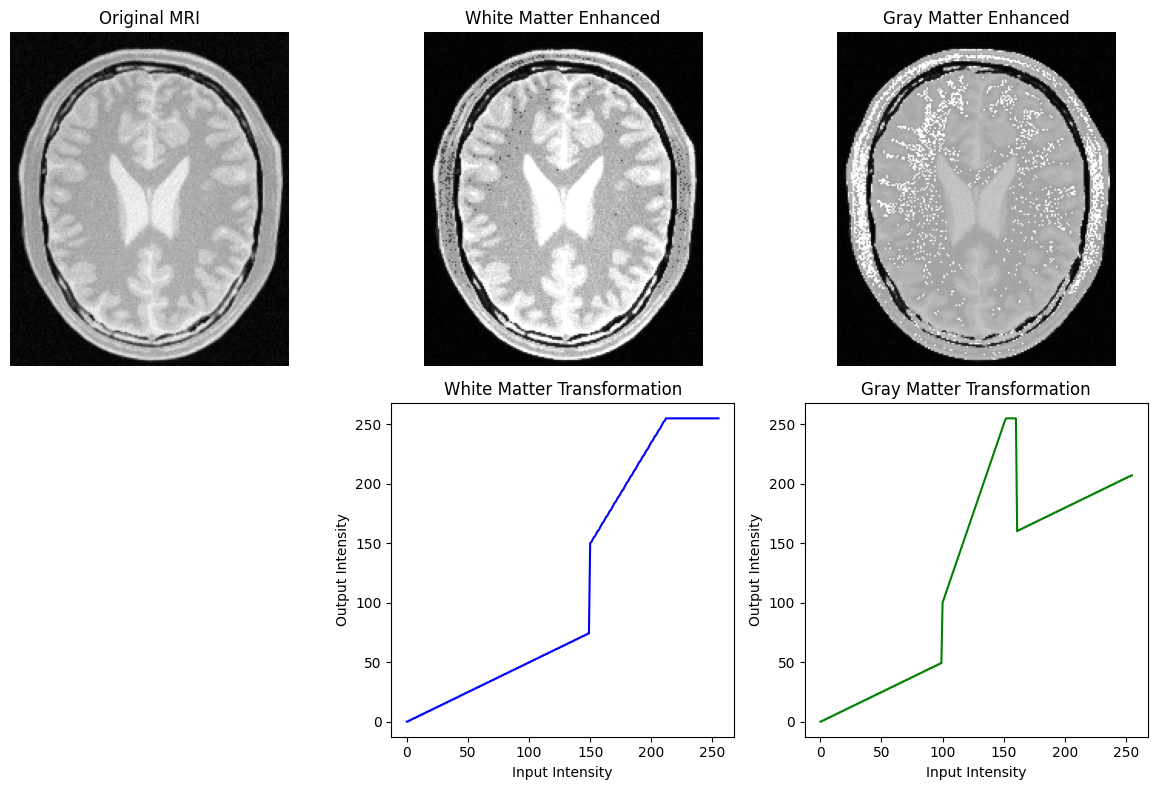

In [19]:


import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read brain MRI in grayscale
img = cv2.imread("images/a1images/brain_proton_density_slice.png", cv2.IMREAD_GRAYSCALE)

# Initialize LUTs for white and gray matter enhancement
lut_white = np.zeros(256, dtype=np.uint8)
lut_gray = np.zeros(256, dtype=np.uint8)

# White matter enhancement
# Assuming white matter intensity is in the range ~150–255
for i in range(256):
    if i < 150:
        lut_white[i] = int(i * 0.5)  # Darken background
    else:
        lut_white[i] = min(255, int(150 + (i - 150) * 1.7))  # Boost white matter

# Gray matter enhancement
# Assuming gray matter intensity is in the range ~100–160
for i in range(256):
    if i < 100:
        lut_gray[i] = int(i * 0.5)  # Darken background
    elif 100 <= i <= 160:
        lut_gray[i] = min(255, int((i - 100) * 3 + 100))  # Strong boost for gray matter
    else:
        lut_gray[i] = min(255, int(160 + (i - 160) * 0.5))  # Slight enhancement

# Apply transformations
white_enhanced = cv2.LUT(img, lut_white)
gray_enhanced = cv2.LUT(img, lut_gray)

# Plot original and enhanced images
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original MRI')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(white_enhanced, cmap='gray')
plt.title('White Matter Enhanced')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(gray_enhanced, cmap='gray')
plt.title('Gray Matter Enhanced')
plt.axis('off')

# Plot intensity transformation curves
plt.subplot(2, 3, 5)
plt.plot(lut_white, color='blue')
plt.title('White Matter Transformation')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')

plt.subplot(2, 3, 6)
plt.plot(lut_gray, color='green')
plt.title('Gray Matter Transformation')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')

plt.tight_layout()
plt.show()



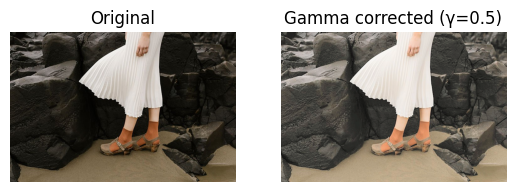

/tmp/ipython-input-3548640664.py:31: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(L.ravel(), 256, [0,256], color='blue', alpha=0.5, label='Original L')
/tmp/ipython-input-3548640664.py:32: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(L_gamma.ravel(), 256, [0,256], color='red', alpha=0.5, label='Corrected L')


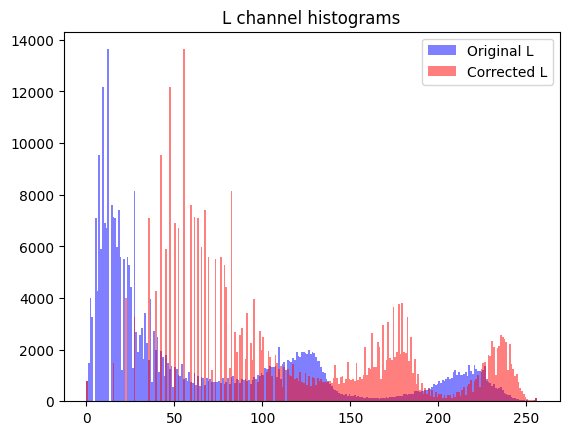

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread("images/a1images/highlights_and_shadows.jpg")

# Convert to Lab color space
lab = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)
L, a, b = cv2.split(lab)

# Normalize L to 0–1
L_norm = L / 255.0

# Gamma value
gamma = 0.5  # example

# Apply gamma correction
L_gamma = np.clip((L_norm ** gamma) * 255, 0, 255).astype(np.uint8)

# Merge back
lab_gamma = cv2.merge((L_gamma, a, b))
img_gamma = cv2.cvtColor(lab_gamma, cv2.COLOR_Lab2BGR)

# Show original & corrected images
plt.subplot(1,2,1); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.title("Original"); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(cv2.cvtColor(img_gamma, cv2.COLOR_BGR2RGB)); plt.title(f"Gamma corrected (γ={gamma})"); plt.axis('off')
plt.show()

# Show histograms of L channel
plt.hist(L.ravel(), 256, [0,256], color='blue', alpha=0.5, label='Original L')
plt.hist(L_gamma.ravel(), 256, [0,256], color='red', alpha=0.5, label='Corrected L')
plt.legend(); plt.title("L channel histograms"); plt.show()


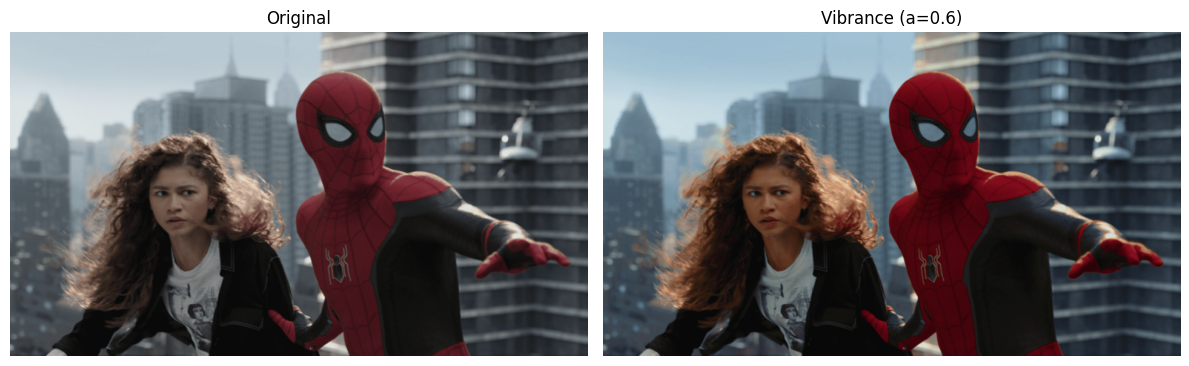

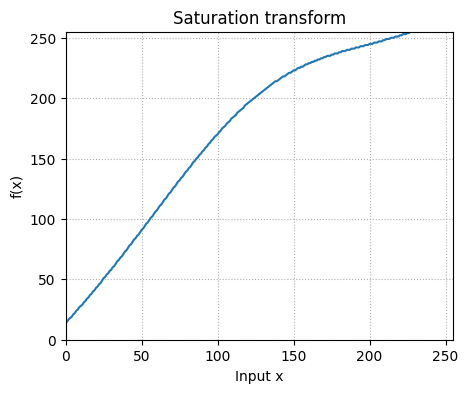

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- load
img = cv2.imread("images/a1images/spider.png")

# --- HSV split
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
H, S, V = cv2.split(hsv)          # OpenCV HSV channels in 0–255 (uint8)

# --- intensity transform  f(x) = min(x + a*128*exp(-((x-128)^2)/(2*sigma^2)), 255)
sigma = 70.0
a = 0.6                           # tweak 0..1 to taste; this gives a nice pop
x = np.arange(256, dtype=np.float32)
f = x + a * 128.0 * np.exp(-((x - 128.0) ** 2) / (2 * sigma ** 2))
lut = np.clip(f, 0, 255).astype(np.uint8)

# apply to saturation plane
S_enh = cv2.LUT(S, lut)

# --- recombine and convert back to BGR/RGB for display
hsv_enh = cv2.merge([H, S_enh, V])
img_enh = cv2.cvtColor(hsv_enh, cv2.COLOR_HSV2BGR)

# --- show original, enhanced, and the transfer curve
plt.figure(figsize=(12,4))
plt.subplot(1,2,1); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.title("Original"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(cv2.cvtColor(img_enh, cv2.COLOR_BGR2RGB)); plt.title(f"Vibrance (a={a})"); plt.axis("off")
plt.tight_layout(); plt.show()

plt.figure(figsize=(5,4))
plt.plot(x, lut); plt.xlim(0,255); plt.ylim(0,255)
plt.title("Saturation transform"); plt.xlabel("Input x"); plt.ylabel("f(x)"); plt.grid(True, ls=":")
plt.show()
